## 1. Introduction
> **Problem Statement:** With the increasing popularity of online payments, the risk of fraudulent transactions is also rising. This poses a significant financial threat to both businesses and consumers. The objective of this analysis is to identify the patterns between fraudulent and non-fraudulent payments to help customers to identify the legitimacy of their transactions. 
<br><br>
**4 Questions:** 
<br>
i. What are the common types of online payment fraud that occur in the dataset? <br>
ii. What are the key features that distinguish fraudulent online transactions from legitimate ones? <br>
iii. How do the characteristics of fraudulent transactions differ across different payment methods. <br>
iv. Which machine learning algorithms are most effective for detecting online payment fraud in this dataset? 

## 2. Import Needed Libraries and Dataset
> The dataset is collected from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments. Link to source: https://www.kaggle.com/datasets/ealaxi/paysim1/data.
> To better understand the dataset, here's the basic information about the dataset:
> * Step: A unit where 1 step equals 1 hour
> * Type: Type of Online Transaction
> * Amount: Amount in Transaction
> * nameOrig: Name of the customer (more like codenames)
> * oldbalanceOrg: Balance of the sender before transaction
> * newbalanceOrig: Balance of the sender after transaction
> * nameDest: Name of the receipent (Destination)
> * oldbalanceDest: Balance of the receipent before transaction
> * newbalanceDest: Balance of the receipent after transaction
> * isFraud: Is it a fraud?
> * isFlaggedFraud: Did the system detect it was a fraud?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("onlinefraud.csv")

## 3. Data Cleaning

In [3]:
# Checking the total numbers of empty values in each column
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

> There are no missing values

In [4]:
# Getting the information about the dataset, to check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


> * Columns associated with money amount are type float64
> * Columns associated with name ar type object
> * Columns associated with boolean types ar int64 except step which represents count of hours

In [5]:
print("Amount of duplicated values in df: " , df.duplicated().sum())

Amount of duplicated values in df:  0


>There are no duplicate values

In [6]:
# Rename some of the original column headers for consistency
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', 
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})
df.head(1)

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0


> ### Data cleaning process is done:
> * There are no missing values.
> * There are no wrong data types.
> * There are no duplicate values.
> * Rename some original column headers for consistency reading.

## 4. Exploratory Data Analysis (EDA) & Data Visualization

In [7]:
# Read the 1st 5rows to explore the data
df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


>There are several columns we can explore to know more about fraudulent and non-fraudulent transactions. Which includes: `type`, `isFraud`.

In [8]:
# Read the shape (rows, cols) of dataset
df.shape

(6362620, 11)

In [9]:
# Describe the dataset
df.describe()

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
# Describe the dataset including object columns
df.describe(include=['object'])

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


### General EDA
> Perform some general EDA without answering the question.

### Answering Question 1:
> **Question:** What are the common types of online payment fraud that occur in the dataset?

In [11]:
# Check the unique values in the column 'type'
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

>By looking at the numbers, it's hard to visualize the proportions of each transaction.
> Thus, we will plot a countplot to better visualize the distribution of dataframe column `type`.

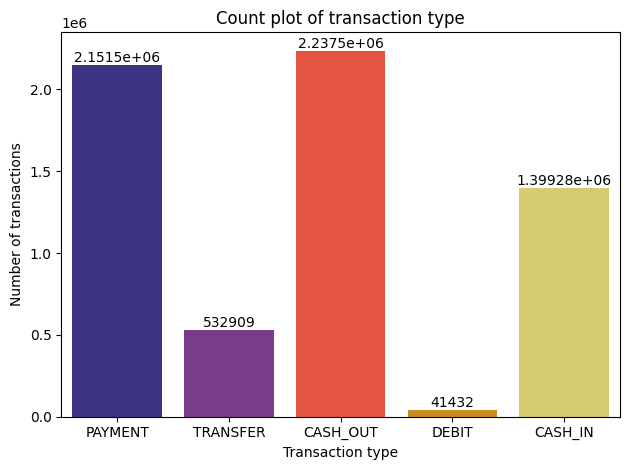

In [12]:
# Using seaborn package to plot the count of each type of transaction
# Type of plot used is countplot
ax = sns.countplot(x='type', data=df, palette='CMRmap')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.xlabel('Transaction type')
plt.ylabel('Number of transactions')
plt.tight_layout()

>From the plot, we can see that cast_out is the most transaction type, followed by payment, cast_in, transfer and debit.
<br><br>
Next, we want to perform analysis on the `isFraud` column.

In [13]:
# Check the unique values in the column 'isFraud'
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

> Again we can use countplot to visualize the dataframe column `isFraud`.

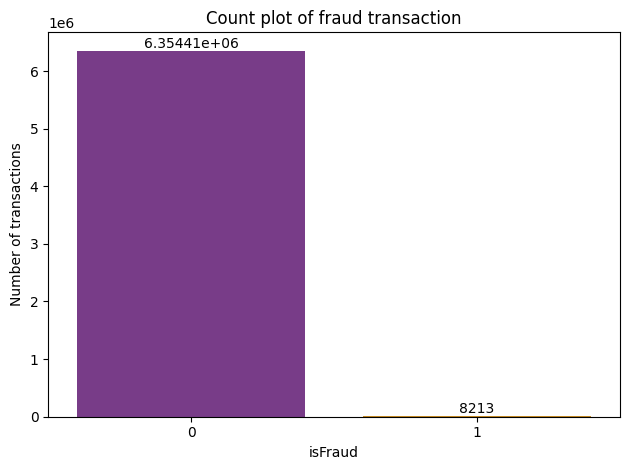

In [14]:
ax = sns.countplot(x='isFraud', data=df, palette='CMRmap')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction')
plt.ylabel('Number of transactions')
plt.tight_layout()

> Next, we want to identify which transaction type are fraudulent.

In [15]:
fraudulent_types = df[df['isFraud'] == 1]['type'].value_counts()
print(fraudulent_types)

type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64


> After running the above code cell, we can see that only type `cash_out` and `transfer` involved with fraudulent transaction. `cash_out` has 4116 frauds and `transfer` has 4097 frauds. Next, let's plot a countplot to better visualize the result.

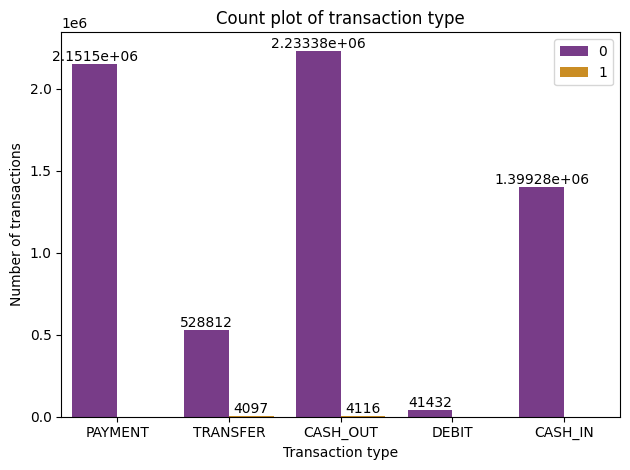

In [16]:
ax = sns.countplot(x='type', data=df, hue='isFraud', palette='CMRmap')
for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Count plot of transaction type')
ax.legend(loc='best')
ax.set_ylabel('Number of transactions')
ax.set_xlabel('Transaction type')
plt.tight_layout()

### Answer for Question 1:
> **Question:** What are the common types of online payment fraud that occur in the dataset? <br>
> **Answer:** The common types of online payment fraud that occur in the dataset are `transfer` and `cash_out`.

## 5. Data Mining / Data Modelling

### 5.1 Data Mining: Clustering

### 5.2 Data Modelling: Building Classification Models
> Since we're dealing with categorical variables (column `isFraud`), the type of predictive models we'll use in this case is classification models.

In [3]:
# Create a copy of the original dataframe
df_model = df.copy()

> In order to train a ML model, we need to normalize the dataframe. To do that, we can use `scikit-learn` package's `LabelEncoder` to normalize our data.

In [4]:
# Normalizing the transaction types to better train the data
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_cat = df_model['type'].values
df_cat_encoded = encoder.fit_transform(df_cat)
df_cat_encoded

array([3, 3, 4, ..., 1, 4, 1])

In [5]:
df_model['type'] = encoder.fit_transform(df_model['type'])
df_model.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


> Drop columns with object type to plot a heatmap for correlation matrix.

In [6]:
df_model = df_model.drop(columns = ['nameOrig', 'nameDest'])

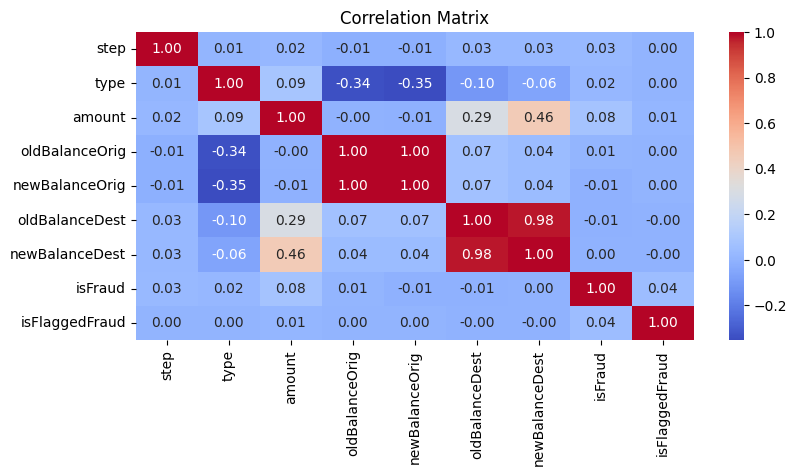

<Figure size 640x480 with 0 Axes>

In [68]:
# checking features correlation
corr = df_model.corr()
plt.figure(figsize=(9,4))
sns.heatmap(df_model.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
plt.tight_layout()

>The heatmap provides a visual representation of the correlation matrix, where each cell represents the correlation between two features. The color of each cell indicates the strength of the correlation, with warmer colors (e.g., red) indicating a stronger positive correlation, and cooler colors (e.g., blue) indicating a stronger negative correlation. The numbers within each cell represent the correlation coefficient.
>
>By examining the heatmap, you can quickly identify patterns and relationships between different features in your dataset. This can help you understand which features are strongly correlated, which can be useful for feature selection, identifying multicollinearity, or gaining insights into the relationships within your data.

### Classification Model Training 1: Logistic Regression

In [24]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import metrics

> #### Step 1: Feature Selection
> Select the relevant data to train

In [8]:
# Data preprocessing already done when plotting a heatmap
X = df_model.drop(columns=['isFraud'], axis=1)
y = df_model['isFraud'].copy()

> #### Step 2: Split Data
> Split the data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# check shapes after splitting
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (4771965, 8)
X_test shape is  (1590655, 8)
y_train shape is  (4771965,)
y_test shape is  (1590655,)


> #### Step 3: Scale the data

In [31]:
# Standardization (Z-Score Normalization) 
# StandardScaler for Data
# Reference: https://www.kaggle.com/code/georgehanymilad/online-payments-fraud-detection

scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Scaling Done")

Data Scaling Done


> Description of the scaling:
> * Standardization Applied: This code cell implements standardization, which scales features in the data to have a mean of 0 and a standard deviation of 1.
> * Generalization: Help the model generalize better to unseen data and avoid overfitting to the specific training data.

> #### Step 4: Train the model

In [32]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

> #### Step 5: Evaluate the model

In [33]:
# Make predictions
y_pred_lg = log_model.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred_lg)
class_report = classification_report(y_test, y_pred_lg)
roc_auc = roc_auc_score(y_test, y_pred_lg)

# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nROC-AUC Score:")
print(roc_auc)

Confusion Matrix:
[[1588461     125]
 [   1190     879]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588586
           1       0.88      0.42      0.57      2069

    accuracy                           1.00   1590655
   macro avg       0.94      0.71      0.79   1590655
weighted avg       1.00      1.00      1.00   1590655


ROC-AUC Score:
0.712382116478041


> Evaluate the results in %.

In [34]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_LR = accuracy_score(y_test, y_pred_lg)
print(f'Accuracy Score : {Accuracy_LR * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_LR = precision_score(y_test, y_pred_lg)
print(f'Precision Score : {Precision_LR * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_LR = recall_score(y_test, y_pred_lg)
print(f'Recall Score : {Recall_LR * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_LR = f1_score(y_test, y_pred_lg)
print(f'F1 Score : {F1_Score_LR * 100 : .2f} %\n')


ROC_AUC_LR = roc_auc_score(y_test, y_pred_lg)
print(f'AUC_ROC : {ROC_AUC_LR * 100 : .2f} %\n')

Accuracy Score :  99.92 %

Precision Score :  87.55 %

Recall Score :  42.48 %

F1 Score :  57.21 %

AUC_ROC :  71.24 %



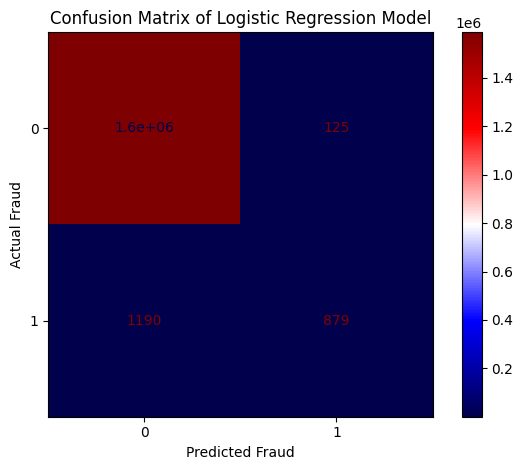

In [35]:
# Create a more intepretable visual dispaly of the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lg), display_labels=log_model.classes_)
cm_display.plot(cmap='seismic')
plt.title('Confusion Matrix of Logistic Regression Model')
plt.xlabel('Predicted Fraud')
plt.ylabel('Actual Fraud')
plt.tight_layout()
plt.show()

> ##### *Confusion Matrix*:
> * True Negatives (TN): 1,588,461 - These are the legitimate transactions correctly identified as non-fraudulent.
> * False Positives (FP): 125 - These are the legitimate transactions incorrectly identified as fraudulent.
> * False Negatives (FN): 1,190 - These are the fraudulent transactions incorrectly identified as legitimate.
> * True Positives (TP): 879 - These are the fraudulent transactions correctly identified as fraudulent.

> ##### *Classification Report*:
| Class | Precision | Recall | F1-Score | Support |
| :-: | :- | :- | :- | :- |
| 0 | All predicted non-fraud are truly non-fraud. | All actual non-fraud are correctly identified. | High accuracy for non-fraud predictions | Number of actual occurences. |
| 1 | 87.55% predicted non-fraud are truly fraud. | 42.28% actual fraud are correctly identified. | Moderate performance of harmonic mean of precision and recall. | Number of actual occurences. |

> ##### *ROC-AUC Score*:
> * The ROC-AUC score of approximately **0.7124** indicates the model's ability to distinguish between the classes (fraudulent and non-fraudulent). A score of 0.9185 means that there's an **71.24%** chance that the model will be able to distinguish a randomly chosen fraudulent transaction from a randomly chosen non-fraudulent one. An ROC-AUC score of 0.5 would indicate a model with no discriminatory power (random guessing), while a score of 1.0 indicates perfect discriminatory power.

> ##### Interpretation:
> 1. **Non-Fraudulent Transactions**: The model performs exceptionally well in identifying non-fraudulent transactions, with both precision and recall close to 1.0.
> 2. **Fraudulent Transactions**: The model shows moderate performance in identifying fraudulent transactions, with a precision of 0.88 but a relatively low recall of 0.42. This means that while the model is quite accurate when it predicts a transaction as fraudulent, it misses a significant portion of actual fraudulent transactions.
> 3. **Overall Performance**: The high overall accuracy and the ROC-AUC score **0.7124** suggest that the model is generally good but can be improved, especially in terms of recall for fraudulent transactions. This may involve tuning the model further, handling class imbalance, or incorporating additional features.

### Classification Model Training 2: Decision Tree

In [16]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

> #### Step 1, Step 2 and Step 3 done in 1st model, no need to split the data again.

> #### Step 4: Train the model
> Use cross-validation to determine the most optimal max_depth for the decision tree. Then train the model and evaluate the result.

In [49]:
# To determine the max_depth of the decision tree, we will use cross-validation
# Source: https://stackoverflow.com/questions/49289187/decision-tree-sklearn-depth-of-tree-and-accuracy
# It will take about an hour to run this code, and result already printed below, so no need to run this cell
from sklearn.model_selection import cross_val_score
import numpy as np

L = []
depth_range = range(1, 21)  
for i in depth_range:
    dtree = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(dtree, X_train, y_train, cv=5, scoring='accuracy')
    L.append(np.mean(scores))  # Use the mean accuracy across cross-validation folds

optimal_depth = depth_range[L.index(max(L))]
print("Optimal max_depth:", optimal_depth)
print("Max accuracy:", max(L))

Optimal max_depth: 19
Max accuracy: 0.9996959323884396


In [37]:
# Fit the model with the optimal max_depth, 19
dt_model = DecisionTreeClassifier(max_depth=19, random_state=1)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=19, random_state=1)

> #### Step 5: Evaluate the model

In [36]:
# Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred_dt)
class_report = classification_report(y_test, y_pred_dt)
roc_auc = roc_auc_score(y_test, y_pred_dt)

# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nROC-AUC Score:")
print(roc_auc)

Confusion Matrix:
[[1588435     151]
 [    333    1736]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588586
           1       0.92      0.84      0.88      2069

    accuracy                           1.00   1590655
   macro avg       0.96      0.92      0.94   1590655
weighted avg       1.00      1.00      1.00   1590655


ROC-AUC Score:
0.9194788146851739


> Evaluate the results in %.

In [25]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_LR = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy Score : {Accuracy_LR * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_LR = precision_score(y_test, y_pred_dt)
print(f'Precision Score : {Precision_LR * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_LR = recall_score(y_test, y_pred_dt)
print(f'Recall Score : {Recall_LR * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_LR = f1_score(y_test, y_pred_dt)
print(f'F1 Score : {F1_Score_LR * 100 : .2f} %\n')


ROC_AUC_LR = roc_auc_score(y_test, y_pred_dt)
print(f'AUC_ROC : {ROC_AUC_LR * 100 : .2f} %\n')

Accuracy Score :  99.97 %

Precision Score :  92.00 %

Recall Score :  83.91 %

F1 Score :  87.77 %

AUC_ROC :  91.95 %



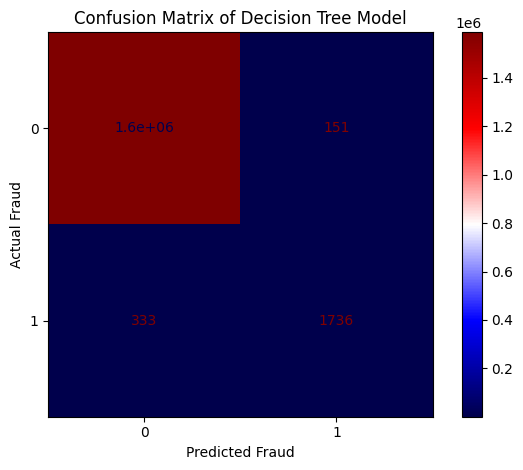

In [30]:
# Create a more intepretable visual dispaly of the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_dt), display_labels=dt_model.classes_)
cm_display.plot(cmap='seismic')
plt.title('Confusion Matrix of Decision Tree Model')
plt.xlabel('Predicted Fraud')
plt.ylabel('Actual Fraud')
plt.tight_layout()
plt.show()

> ##### *Confusion Matrix*:
> * True Negatives (TN): 1,588,435 - These are the transactions correctly identified as non-fraudulent.
> * False Positives (FP): 151 - These are the transactions incorrectly identified as fraudulent
> * False Negatives (FN): 333 - These are the fraudulent transactions that were incorrectly identified as non-fraudulent.
> * True Positives (TP): 1,736 - These are the transactions correctly identified as fraudulent.

> #### Step 5: Visualizing the decision tree

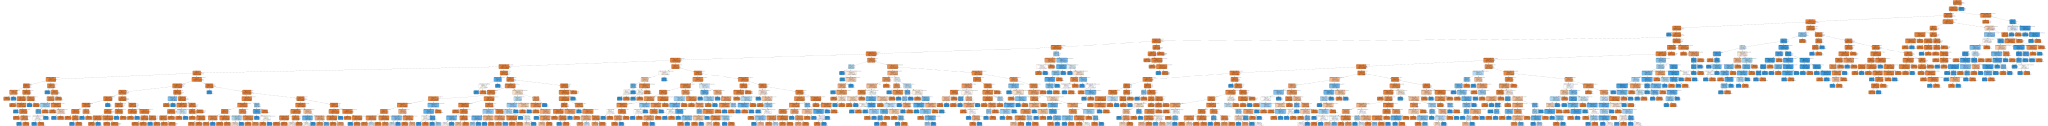

In [67]:
# Visualize the decision tree (requires graphviz to be installed)
# Source: https://www.datacamp.com/tutorial/decision-tree-classification-python
from sklearn.tree import export_graphviz
import graphviz
import os

# Add the path to the Graphviz executables to the system's PATH
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin'

# Export the tree to a .pdf file with features
dot_data = export_graphviz(dt_model, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['Not Fraud', 'Fraud'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")  # This will save the decision tree as a .pdf file
graph # This will display the decision tree in the notebook, but it may be too large to view. Comment out if needed.

> ##### *Classification Report*:
| Class | Precision | Recall | F1-Score | Support |
| :-: | :- | :- | :- | :- |
| 0 | All predicted non-fraud are truly non-fraud. | All actual non-fraud are correctly identified. | High accuracy for non-fraud predictions | Number of actual occurences. |
| 1 | 92% predicted non-fraud are truly fraud. | 83.91% actual fraud are correctly identified. | Balance between precision and recall for fraud predictions | Number of actual occurences. |

> ##### *ROC-AUC Score*:
> * The ROC-AUC score of approximately **0.9195** indicates the model's ability to distinguish between the classes (fraudulent and non-fraudulent). A score of 0.9185 means that there's an **91.95%** chance that the model will be able to distinguish a randomly chosen fraudulent transaction from a randomly chosen non-fraudulent one.

> ##### Interpretation:
> 1. **High Accurarcy**: The model has a very high accuracy, correctly identifying almost all transactions. This is evident from the confusion matrix and the accuracy score.
> 2. **High Precision for Fraudulent Transactions**: The model has a high precision for fraudulent transactions (0.95), meaning it has a low false positive rate. When it predicts a transaction as fraudulent, it is very likely to be correct.
> 3. **Strong Overall Performance**: The weighted averages are very high, showing that the model performs well overall, but it might be slightly biased due to the imbalance in the dataset (more non-fraudulent than fraudulent transactions).
> 4. **Good Discriminative Ability**: The ROC-AUC score of **0.9185** indicates that the model has an excellent ability to distinguish between fraudulent and non-fraudulent transactions.

### Answer for Question 4:
> **Question:** Which machine learning algorithms are most effective for detecting online payment fraud in this dataset? <br>
> **Answer:** After performing analysis on 2 models: Logistic Regression & Decision Tree, the ROC-AUC score (score for classification tasks) for Logistic Regression is 0.7124 while Decision Tree is 0.9195. This shows that Decision Tree has a higher score and are the most effective at detecting online payment fraud in this dataset. 